In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.preprocessing import PolynomialFeatures

#New! for Legendre
from scipy.special import legendre
from sklearn.metrics import r2_score #for r-squared


import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from matplotlib import rc

## Data Pre Processing and Visualization

### Load Data

In [2]:
path = '/Users/Farid/Downloads/woolsey-selected/'

sensor_interest_1 = pd.read_csv(path+'sensor_interest_1 764632.txt')
print('sensor_interest_1: ', sensor_interest_1.shape)

sensor_interest_2 = pd.read_csv(path+'sensor_interest_2 764848.txt')
print('sensor_interest_2: ', sensor_interest_2.shape)

sensor_interest_3 = pd.read_csv(path+'sensor_interest_3 764632.txt')
print('sensor_interest_3: ', sensor_interest_3.shape)

sensor_interest_1:  (9216, 38)
sensor_interest_2:  (9216, 38)
sensor_interest_3:  (9216, 38)


### Visualize the Data

In [159]:
from datetime import datetime, timedelta

# Define the starting date
start_date = datetime(2023, 10, 1)  # start from 1st October 2023

# Define the number of days
n_days = 3

# Create the list of days
days = [(start_date + timedelta(days=i)).strftime('%m/%d') for i in range(n_days)]
print('days: ', days)


days:  ['10/01', '10/02', '10/03']


/var/folders/l0/yttdmtl97n7fd1v82xdlzb7c0000gn/T/ipykernel_49400/3001612389.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_data['Time'] = pd.to_datetime(time_series_data['Time'])
/var/folders/l0/yttdmtl97n7fd1v82xdlzb7c0000gn/T/ipykernel_49400/3001612389.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_data['Time'] = pd.to_datetime(time_series_data['Time'])
/var/folders/l0/yttdmtl97n7fd1v82xdlzb7c0000gn/T/ipykernel_49400/3001612389.py:29: SettingWithCopyWarning: 
A value is

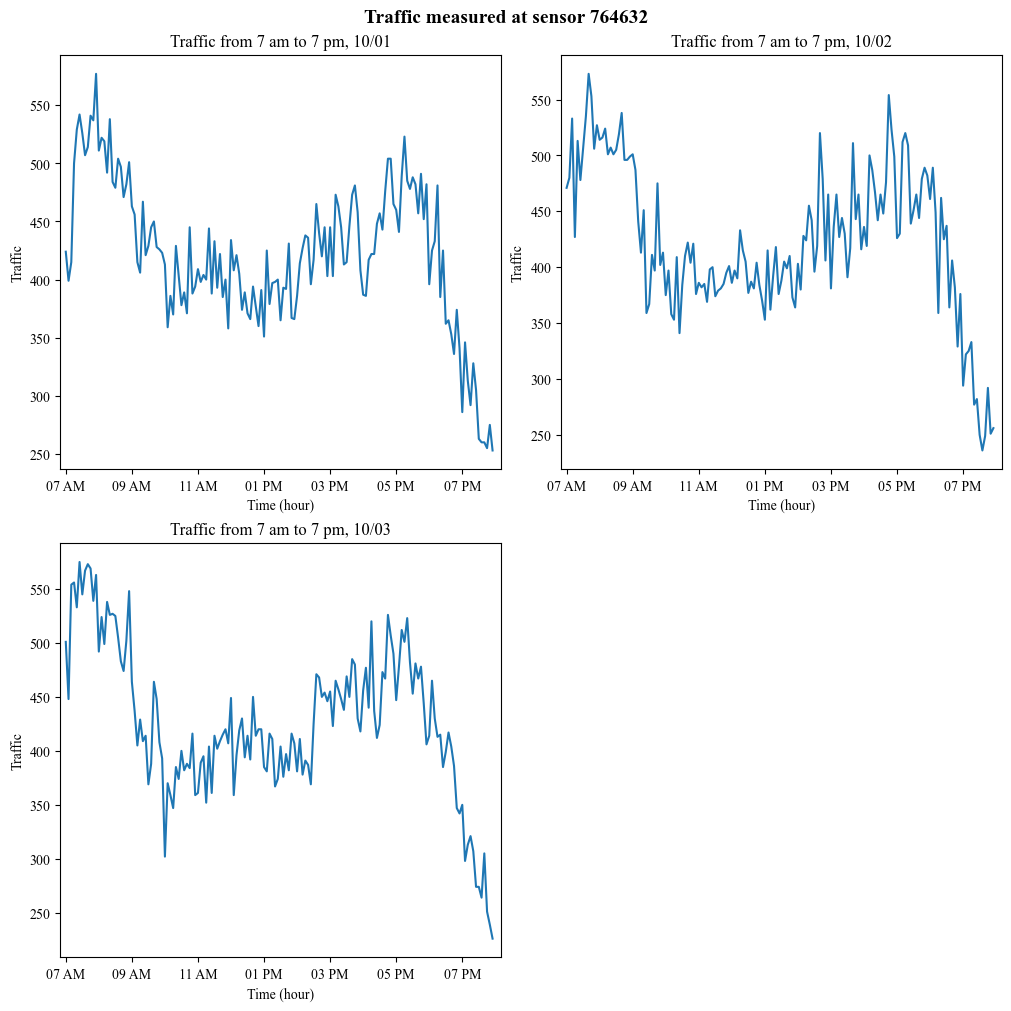

/var/folders/l0/yttdmtl97n7fd1v82xdlzb7c0000gn/T/ipykernel_49400/3001612389.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_data['Time'] = pd.to_datetime(time_series_data['Time'])
/var/folders/l0/yttdmtl97n7fd1v82xdlzb7c0000gn/T/ipykernel_49400/3001612389.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_data['Time'] = pd.to_datetime(time_series_data['Time'])
/var/folders/l0/yttdmtl97n7fd1v82xdlzb7c0000gn/T/ipykernel_49400/3001612389.py:76: SettingWithCopyWarning: 
A value is

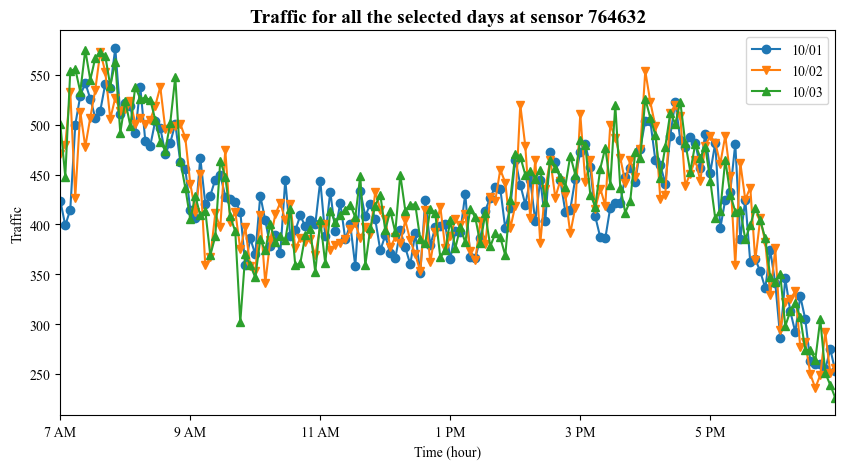

In [160]:

################################################################################################
sensor_interest = sensor_interest_1
sensor_id = 764632
################################################################################################


#####   Subplots
#####


# Set default font to 'Times New Roman'
rc('font', family='Times New Roman')


# Calculate number of rows required for subplots
n = len(days)
nrows = n // 2 if n % 2 == 0 else n // 2 + 1

# Initialize figure and axes for subplots
fig, axs = plt.subplots(nrows=nrows, ncols=2, figsize=(10, nrows*5), constrained_layout=True)
axs = axs.flatten()  # flatten array to make indexing easier

fig.suptitle(f'Traffic measured at sensor {sensor_id}', fontsize=14, weight='bold')

for i, day in enumerate(days):
    ax = axs[i]  # current subplot

    time_series_data = sensor_interest[sensor_interest['Time'].str.startswith(day)]
    time_series_data['Time'] = pd.to_datetime(time_series_data['Time'])

    # Filter out data outside of 7 AM to 7 PM
    time_series_data = time_series_data[(time_series_data['Time'].dt.hour >= 7) & (time_series_data['Time'].dt.hour <= 19)]

    # y values
    traffic = time_series_data['10']

    # x values - use 'Time' values
    time = time_series_data['Time']

    # Create scatter plot
    ax.plot(time, traffic)

    # Set x-axis format and locator
    hours = mdates.DateFormatter('%I %p')
    hour_locator = mdates.HourLocator(interval=2)  # put a tick on every 2 hours
    ax.xaxis.set_major_locator(hour_locator)
    ax.xaxis.set_major_formatter(hours)

    # Adjust x limits to start slightly before 7 AM and end at 7 PM
    start_time = time.min().replace(hour=6, minute=50, second=0)  # 10 minutes before 7 AM
    end_time = time.max().replace(hour=20, minute=10, second=0)
    ax.set_xlim(start_time, end_time)

    # Set axis titles
    ax.set_xlabel('Time (hour)')
    ax.set_ylabel('Traffic')
    ax.set_title('Traffic from 7 am to 7 pm, '+day)

# If there are more subplots than days (i.e. an even number of subplots), remove the extra one
if len(days) % 2 != 0:
    fig.delaxes(axs[-1])  

plt.show()

#####   Additional 1-plot
#####


# Define a list of markers
markers = ['o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_', '.', ',']

fig, ax = plt.subplots(figsize=(10, 5))

for i, day in enumerate(days):
    time_series_data = sensor_interest[sensor_interest['Time'].str.startswith(day)]
    time_series_data['Time'] = pd.to_datetime(time_series_data['Time'])

    # Filter out data outside of 7 AM to 7 PM
    time_series_data = time_series_data[(time_series_data['Time'].dt.hour >= 7) & (time_series_data['Time'].dt.hour <= 19)]

    # y values
    traffic = time_series_data['10']

    # Plot the data for all series with different markers for each day
    if n_days < 10:
        ax.plot(np.arange(len(traffic)), traffic, label=day, marker=markers[i%len(markers)])
    else:
        ax.plot(np.arange(len(traffic)), traffic, label=day)  # Use modulus to prevent out of index errors

# Set x-axis ticks and labels
x_ticks = np.linspace(0, len(traffic), 7)  # generate 7 evenly spaced x-axis locations
time_labels = ['7 AM', '9 AM', '11 AM', '1 PM', '3 PM', '5 PM', '7 PM']  # corresponding time labels
ax.set_xticks(x_ticks)
ax.set_xticklabels(time_labels)

# Adjust x limits to start slightly before 7 AM and end at 7 PM
start_time = np.arange(len(traffic)).min()  # 10 minutes before 7 AM
end_time = np.arange(len(traffic)).max()  # 10 minutes after 7 PM
ax.set_xlim(start_time, end_time)

# Set labels and title for the combined plot
ax.set_xlabel('Time (hour)')
ax.set_ylabel('Traffic')
ax.set_title(f'Traffic for all the selected days at sensor {sensor_id}', fontsize=14, weight='bold')
ax.legend()

plt.show()

/var/folders/l0/yttdmtl97n7fd1v82xdlzb7c0000gn/T/ipykernel_49400/4281736183.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_data['Time'] = pd.to_datetime(time_series_data['Time'])


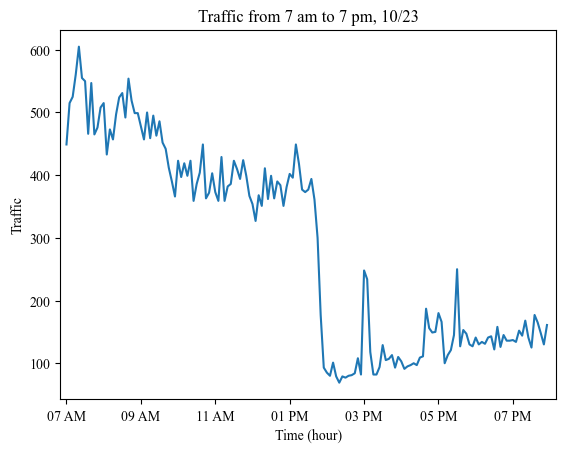

In [5]:
day = "10/23"
################################################################################################


# Set default font to 'Times New Roman'
rc('font', family='Times New Roman')


time_series_data = sensor_interest[sensor_interest['Time'].str.startswith(day)]

# Ensure 'Time' column is in datetime format
time_series_data['Time'] = pd.to_datetime(time_series_data['Time'])

# Filter out data outside of 7 AM to 7 PM
time_series_data = time_series_data[(time_series_data['Time'].dt.hour >= 7) & (time_series_data['Time'].dt.hour <= 19)]

# y values
traffic = time_series_data['10']

# x values - use 'Time' values
time = time_series_data['Time']

fig, ax = plt.subplots()

# Create scatter plot
ax.plot(time, traffic)

# Set x-axis format and locator
hours = mdates.DateFormatter('%I %p')
hour_locator = mdates.HourLocator(interval=2)  # put a tick on every 2 hours
ax.xaxis.set_major_locator(hour_locator)
ax.xaxis.set_major_formatter(hours)

# Adjust x limits to start slightly before 7 AM and end at 7 PM
start_time = time.min().replace(hour=6, minute=50, second=0)  # 10 minutes before 7 AM
end_time = time.max().replace(hour=20, minute=10, second=0)
ax.set_xlim(start_time, end_time)

# Set axis titles
ax.set_xlabel('Time (hour)')
ax.set_ylabel('Traffic')
ax.set_title('Traffic from 7 am to 7 pm, '+day)

plt.show()


## Traffic Prediction

In [104]:
def generate_multi_legendre_design_matrix_(x_initial, polynomial_order):
    if np.isscalar(x_initial):
        x_initial = np.array([[x_initial]])

    # Ensure x_initial is a 2D numpy array
    x_initial = np.atleast_2d(x_initial)
    

    # N is the number of observations,      num_vars is the number of input variables
    N, n_input_vars = x_initial.shape

    # Number of terms in the expansion for each variable (x1^0, x1^1, x1^2, ...)
    n_expansion_terms = polynomial_order + 1

    # Total number of terms in the expansion
    total_expansion_terms = n_expansion_terms ** n_input_vars

    # Initialize design matrix
    design_matrix = np.empty((N, total_expansion_terms), dtype='float64')

    # Loop over each data point
    for i in range(N):
        col_index = 0 # just a counter
        # Loop over all combinations of polynomial orders for each variable
        for terms in np.ndindex(*([n_expansion_terms]*n_input_vars)): ######## CHECK
            product = 1.0
            # Calculate the product of Legendre polynomials for this combination of terms
            for var in range(n_input_vars):
                P_j = legendre(terms[var])
                product *= P_j(x_initial[i, var])
            # Store result in the design matrix
            design_matrix[i, col_index] = product
            col_index += 1
            
    return design_matrix

In [150]:
import numpy as np
from numpy.polynomial.legendre import Legendre
from sklearn.preprocessing import MinMaxScaler

def generate_multi_legendre_design_matrix(x_initial, polynomial_order):
    x_initial = np.atleast_2d(x_initial)
    n_input_vars = x_initial.shape[1]
    
    # Generate multi-index for which the sum of the indices is <= polynomial_order
    indices = np.indices((polynomial_order + 1,) * n_input_vars).reshape(n_input_vars, -1)
    indices = indices[:, np.sum(indices, axis=0) <= polynomial_order]
    
    # Initialize design matrix
    design_matrix = np.empty((x_initial.shape[0], indices.shape[1]), dtype='float64')

    # Initialize MinMaxScaler to normalize to range [-1,1]
    scaler = MinMaxScaler(feature_range=(-1, 1))
    #x_initial = scaler.fit_transform(x_initial)
    
    # Compute product of variables raised to the power of indices
    for row in range(x_initial.shape[0]):
        for col, idx in enumerate(indices.T):
            product = 1
            for var, power in enumerate(idx):
                if power != 0:
                    P_j = Legendre.basis(deg=power)
                    product *= P_j(x_initial[row, var])
                else:
                    product *= 1
            design_matrix[row, col] = product
            
    return design_matrix

In [130]:
xx = np.array([[1, 1, 1], [2, 2, 2]]).T
xx

array([[1, 2],
       [1, 2],
       [1, 2]])

In [131]:

print('generate_multi_legendre_design_matrix_: ', generate_multi_legendre_design_matrix_(xx,2).shape)
generate_multi_legendre_design_matrix_(xx,2)

generate_multi_legendre_design_matrix_:  (3, 9)


array([[1. , 2. , 5.5, 1. , 2. , 5.5, 1. , 2. , 5.5],
       [1. , 2. , 5.5, 1. , 2. , 5.5, 1. , 2. , 5.5],
       [1. , 2. , 5.5, 1. , 2. , 5.5, 1. , 2. , 5.5]])

In [132]:

print('generate_multi_legendre_design_matrix: ', generate_multi_legendre_design_matrix(xx,2).shape)
generate_multi_legendre_design_matrix(xx,2)

generate_multi_legendre_design_matrix:  (3, 6)


array([[1. , 2. , 5.5, 1. , 2. , 1. ],
       [1. , 2. , 5.5, 1. , 2. , 1. ],
       [1. , 2. , 5.5, 1. , 2. , 1. ]])

In [136]:
taco = 2 * np.random.rand(10, 15) - 1
generate_multi_legendre_design_matrix(taco,2).shape
print('generate_multi_legendre_design_matrix(xx,2).shape: ', generate_multi_legendre_design_matrix(taco,2).shape)
#generate_multi_legendre_design_matrix_(taco,2).shape
#print('generate_multi_legendre_design_matrix_(xx,2).shape: ', generate_multi_legendre_design_matrix_(taco,2).shape)

generate_multi_legendre_design_matrix(xx,2).shape:  (10, 136)


In [137]:
def online_kaczmarz_legendre_multiple(x_initial, target_values, polynomial_order, weights=None):

    design_matrix = generate_multi_legendre_design_matrix(x_initial, polynomial_order)

    if weights is None:
        # initialize the weights to be the number of columns in the design matrix
        weight_predictions = np.random.rand(design_matrix.shape[1])
    else:
        weight_predictions = weights

    beta_parameter = 0

    for i in range (design_matrix.shape[0]):
        a = design_matrix[i, :]
        weight_predictions = weight_predictions + ((target_values[i] - np.dot(a, weight_predictions)) / np.linalg.norm(a)**2) * a.T

        # This is for beta
        # Note: you may want to uncomment this if you want to compute beta_parameter
        # residual_errors = target_values - design_matrix @ weight_predictions
        # sse = residual_errors.T @ residual_errors
        # beta_parameter = sse / ( - polynomial_order)

    return weight_predictions, beta_parameter

In [48]:
path = '/Users/Farid/Downloads/woolsey-selected/'

sensor_interest_1 = pd.read_csv(path+'sensor_interest_1 737433.txt')
print('sensor_interest_1: ', sensor_interest_1.shape)

sensor_1_m_1 = pd.read_csv(path+'sensor_1_m_8 772564.txt')
sensor_1_m_2 = pd.read_csv(path+'sensor_1_m_9 775975.txt')
sensor_1_m_3 = pd.read_csv(path+'sensor_1_m_11 775961.txt')
sensor_1_m_4 = pd.read_csv(path+'sensor_1_m_14 775949.txt')


sensor_interest_1:  (9216, 38)
sensor_1_m_2:        Unnamed: 0.1  Unnamed: 0                 Time  Sensor  District  Fwy  5   
0         36318553    36318553  10/01/2018 00:00:00  775975         7  126  E  \
1         36323406    36323406  10/01/2018 00:05:00  775975         7  126  E   
2         36328259    36328259  10/01/2018 00:10:00  775975         7  126  E   
3         36333112    36333112  10/01/2018 00:15:00  775975         7  126  E   
4         36337965    36337965  10/01/2018 00:20:00  775975         7  126  E   
...            ...         ...                  ...     ...       ...  ... ..   
9211      20926783    20926783  11/01/2018 23:35:00  775975         7  126  E   
9212      20931631    20931631  11/01/2018 23:40:00  775975         7  126  E   
9213      20936479    20936479  11/01/2018 23:45:00  775975         7  126  E   
9214      20941327    20941327  11/01/2018 23:50:00  775975         7  126  E   
9215      20946175    20946175  11/01/2018 23:55:00  775975    

In [85]:
r = 3  # set r to any value

# Minimum number of rows across all dataframes
min_rows = min(sensor_interest_1.shape[0], sensor_1_m_1.shape[0], sensor_1_m_2.shape[0], sensor_1_m_3.shape[0], sensor_1_m_4.shape[0])

# Initialize an empty list to store all row vectors
row_vectors = []

# Iterate over each index from r to min_rows
for i in range(r, min_rows):
    # Generate a list of indexes you're interested in. In this case, it's [i-r, i-r+1, ..., i]
    ind = list(range(i-r, i+1))
    indexes = list(range(i-r+1, i+1))
    
    # Get the desired elements
    sensor_interest_1_traffic = sensor_interest_1.loc[ind, '10'].values
    sensor_1_m_1_traffic = sensor_1_m_1.loc[indexes, '10'].values
    sensor_1_m_2_traffic = sensor_1_m_2.loc[indexes, '10'].values
    sensor_1_m_3_traffic = sensor_1_m_3.loc[indexes, '10'].values
    sensor_1_m_4_traffic = sensor_1_m_4.loc[indexes, '10'].values
    
    # Concatenate them into a 1xr*5 row vector
    row_vector = np.concatenate([sensor_interest_1_traffic, sensor_1_m_1_traffic, sensor_1_m_2_traffic, sensor_1_m_3_traffic, sensor_1_m_4_traffic])
    
    # Append the row vector to our list
    row_vectors.append(row_vector)

# Convert our list of row vectors into a 2D numpy array
traffic_737433 = pd.DataFrame(row_vectors)
traffic_737433


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,51.0,51.0,44.0,48.0,65.0,63.0,59.0,8.0,8.0,4.0,4.0,6.0,5.0,13.0,7.0,18.0
1,51.0,44.0,48.0,49.0,63.0,59.0,45.0,8.0,4.0,3.0,6.0,5.0,3.0,7.0,18.0,6.0
2,44.0,48.0,49.0,46.0,59.0,45.0,57.0,4.0,3.0,10.0,5.0,3.0,7.0,18.0,6.0,10.0
3,48.0,49.0,46.0,46.0,45.0,57.0,49.0,3.0,10.0,16.0,3.0,7.0,10.0,6.0,10.0,16.0
4,49.0,46.0,46.0,45.0,57.0,49.0,54.0,10.0,16.0,7.0,7.0,10.0,4.0,10.0,16.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9207,81.0,95.0,75.0,97.0,91.0,96.0,76.0,22.0,26.0,6.0,12.0,8.0,6.0,2.0,8.0,12.0
9208,95.0,75.0,97.0,82.0,96.0,76.0,84.0,26.0,6.0,33.0,8.0,6.0,8.0,8.0,12.0,11.0
9209,75.0,97.0,82.0,75.0,76.0,84.0,86.0,6.0,33.0,23.0,6.0,8.0,5.0,12.0,11.0,19.0
9210,97.0,82.0,75.0,95.0,84.0,86.0,74.0,33.0,23.0,24.0,8.0,5.0,20.0,11.0,19.0,11.0


In [154]:
class OnlineNormalizer:
    def __init__(self):
        self.min = None
        self.max = None

    def transform(self, x):
        if self.min is None or self.max is None:
            self.min = x.min()
            self.max = x.max()

        self.min = min(self.min, x.min())
        self.max = max(self.max, x.max())
        
        return (x - self.min) / (self.max - self.min)

In [155]:

################################################################################################
####    Definition of "Hyperparameters"
################################################################################################

t = 250
#t = traffic_737433.shape[0] # Number of points to be generated, and times the coefficients will be updated.
        # The coefficients w are calculatd for each of these points, the idea is to simulate an on-line stream of data. 

# Generate all x upfront
"""
    Update this if using more input variables, # the function should be able to handle more than 2
"""
X = traffic_737433.iloc[:t, 1:]
x = X.T.values.tolist()  # efficient way of unpacking columns into separate variables
       

polynomial_degree = 2

"""
    USING Total (vs. Max) EXPANCTION TERMS
    Number of terms in the weights matrix: 
    (Poynomial Order + 1) ** # of input variables
    (2+1)^2
"""

# Generate Y as target_values (real Y's)
noise = np.random.normal(scale= 0.1 , size=(t))

target_values = traffic_737433.iloc[:t, 0]       # + noise


# Initialize weights 
weights_over_time = []


################################################################################################
####    Online estimation of coefficients
################################################################################################

normalizer = OnlineNormalizer()

for i in range(t):
    x_i = X.iloc[i, :]
    x_i_normalized = normalizer.transform(x_i)

    if i == 0:
        weight_predictions, _ = online_kaczmarz_legendre_multiple(x_i, ([target_values[i]]), polynomial_degree)
    else:
        weight_predictions, _ = online_kaczmarz_legendre_multiple(x_i, ([target_values[i]]), polynomial_degree, weight_predictions)
    
    weights_over_time.append(weight_predictions)

weights_over_time = np.array(weights_over_time)

print('weights_over_time: ', weights_over_time.shape)

weight = weights_over_time[-1]
Weights = pd.DataFrame({
    'Estimated_Weights': weight
})

# Style DataFrame
Weights.style.format("{:.4f}")

weights_over_time:  (250, 136)


,Estimated_Weights
0,1.9037
1,-0.4489
2,1.6884
3,-0.1460
4,1.9417
5,1.3729
6,-0.8966
7,1.9503
8,1.3435
9,2.0497


In [156]:
################################################################################################
####    Results
################################################################################################

# Use last predicted weights to compute y_hat
y_hat = generate_multi_legendre_design_matrix(X, polynomial_degree) @ weight.T

Predicted_Values = y_hat[-10:]
Real_Values = target_values[-10:]
difference = (Real_Values-Predicted_Values).T


Y = pd.DataFrame({
    'Predicted_Values': Predicted_Values,
    'Real_Values': Real_Values,
    'Difference': difference
})

# Style DataFrame
Y.style.format("{:.4f}")

,Predicted_Values,Real_Values,Difference
240,30.3416,231.0000,200.6584
241,27.9079,252.0000,224.0921
242,39.3269,218.0000,178.6731
243,45.2735,236.0000,190.7265
244,51.6831,216.0000,164.3169
245,48.1255,208.0000,159.8745
246,35.1012,194.0000,158.8988
247,33.2492,197.0000,163.7508
248,39.7387,206.0000,166.2613
249,49.3900,206.0000,156.6100


r2:  -3.540022686687071


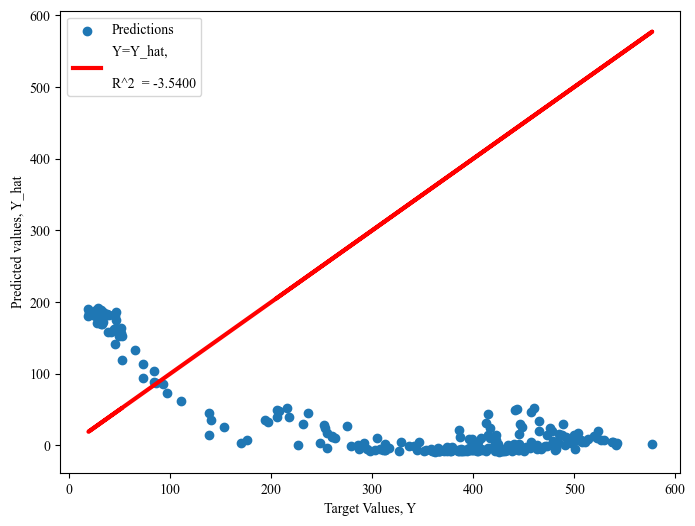

In [157]:
# Plot the accuracy
plt.figure(figsize=(8, 6))
r2 = r2_score(target_values, y_hat)
print('r2: ', r2)
plt.scatter(target_values, y_hat, label='Predictions')
plt.plot(target_values, target_values, color='red', linewidth = 3, label=f'Y=Y_hat, \n\nR^2  = {r2:.4f}')
plt.xlabel('Target Values, Y')
plt.ylabel('Predicted values, Y_hat')
plt.legend()
plt.show()

In [158]:
import math

# Determine the grid size
num_weights = weights_over_time.shape[1]
grid_size = math.ceil(math.sqrt(num_weights))

# Create a grid of subplots, one for each weight
fig, axs = plt.subplots(grid_size, grid_size, figsize=(12*grid_size, 12*grid_size))

# Flatten the axs for easier iteration
axs_flat = axs.flatten()

# Define the polynomial terms
polynomial_terms = []
for i in range(polynomial_degree+1):
    for j in range(polynomial_degree+1):
        polynomial_terms.append(f'x1^{i} * x2^{j}')

for i in range(num_weights):
    axs_flat[i].plot(weights_over_time[:, i])
    axs_flat[i].set_title(f'Weight w{i} for ({polynomial_terms[i]})', fontweight='bold')
    real_value = real_coeffs[i]
    axs_flat[i].axhline(y=real_value, linestyle='dashed', color='red', label=f"Real weight: {real_value:.1f}")
    axs_flat[i].set_xlabel('Timestep')
    axs_flat[i].set_ylabel('Weight value')
    axs_flat[i].legend()

# Remove empty subplots
if grid_size**2 > num_weights:
    for i in range(num_weights, grid_size**2):
        fig.delaxes(axs_flat[i])

plt.tight_layout()
plt.show()

IndexError: index 4 is out of bounds for axis 0 with size 4